In [1]:
%matplotlib inline
import numpy as np
import parameters as p
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from collections.abc import Iterable
import collections
import six
from scipy import interpolate
import pandas as pd
from IPython.display import display, Math
import random as rand
import terrestrialplanet as tp
import thermal as therm
import topography as top
import rheology as rh
import inputs as ins
from mpl_tools import colorize
import matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib import rc
# matplotlib.font_manager._rebuild()
rc('font',**{'family':'serif','serif':['CMU Serif Roman']}) # latex font for matplotlib
rc('text', usetex=True)
# np.seterr('raise')

# fig_path = '/space/cmg76/figs/' # office
fig_path = 'figs/' # laptop#
goodfig_path = 'latex/report-firstyr/figs/'

import pyshtools
import cartopy.crs as ccrs

0          0.000
1          1.000
2      43645.400
3     103830.000
4      33778.800
5      73643.400
6      80369.300
7      23963.600
8      36952.900
9      17724.500
10      9073.240
11     15584.000
12      5405.130
13      6159.000
14      2709.620
15      3152.940
16      2280.570
17      1798.390
18      1480.880
19      1167.740
20      1094.480
21      1048.350
22      1071.420
23      1094.960
24       941.312
25       774.922
26       962.167
27       827.244
28       863.831
29       775.375
30       742.698
31       726.999
32       696.232
33       560.925
34       525.697
35       652.722
36       638.784
37       561.110
38       492.880
39       423.718
40       356.457
Name: S_l, dtype: float64


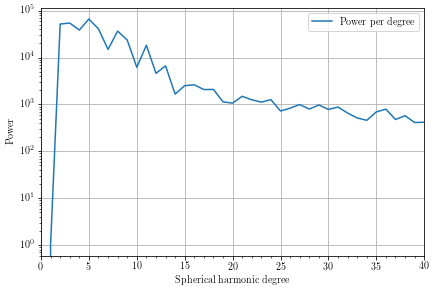

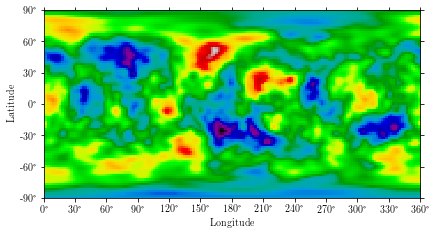

In [50]:
# initialize spherical harmonic coefficients randomly from a given power spectrum

fpath = 'benchmarks/wei_Venus/'
df = pd.read_csv(fpath+'model_power_m2_b.csv', header=None, names=['l', 'S_l'], index_col=False)

degrees = df['l']
power = df['S_l']
coeffs_global = pyshtools.SHCoeffs.from_random(power, normalization='4pi')
print(power)
# make sure you did it right

fig, ax = coeffs_global.plot_spectrum(xscale='lin', yscale='log', show=False)    


# show on spatial grid

grid = coeffs_global.expand(grid='DH2')
fig, ax = grid.plot(show=False, cmap='nipy_spectral')


# show=False is used to avoid a warning when plotting in inline mode

# When initializing a new class instance, the default is to assume that the input coefficients 
# are 4$\pi$ normalized excluding the Condon-Shortley phase. This normalization convention 
# can be overridden by setting the optional parameter normalization, 
# which takes values of '4pi', 'ortho', 'schmidt', or 'unnorm', 
# along with the parameter csphase, 
# which can be 1 (to exclude the Condon-Shortley phase) or -1 (to include it). 

2.08207272029838


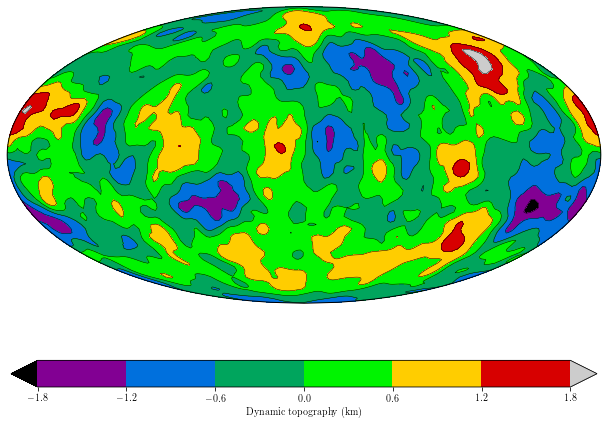

In [51]:
# Expand onto a regular lat/lon grid for plotting
topo = coeffs_global.expand()#lmax=20)
data = topo.data * 1e-3
lats = topo.lats()
lons = topo.lons()

# Aid plotting by repeating the 0 degree longitude as 360 degree longitude
lons = np.hstack([lons,np.array([360.0])])
v = data[:,0]
v=v.reshape((v.shape[0],1))
data = np.hstack([data, v])

print(np.max(data))

data_crs = ccrs.PlateCarree()
proj_crs = ccrs.Mollweide(central_longitude=22.5)

fig=plt.figure(figsize=(12,7))
ax = plt.axes(projection=proj_crs)
ax.set_global()
# ax.coastlines()
cf= ax.contourf(lons, lats, data,cmap='nipy_spectral',
                transform=data_crs, extend="both")
ct = ax.contour(lons,lats,data, 
                colors='black', linewidths = 0.5, 
                linestyles = 'solid', transform=data_crs)
cbar = plt.colorbar(cf, orientation = 'horizontal', label='Dynamic topography (km)', fraction = 0.07)

# this is close enough without Ishtar Terra which is not dynamically supported

In [9]:
def scale_spectrum(power_0):
    
    


Object `pysh.expand.SHGrid.plot` not found.


NameError: name 'utils' is not defined